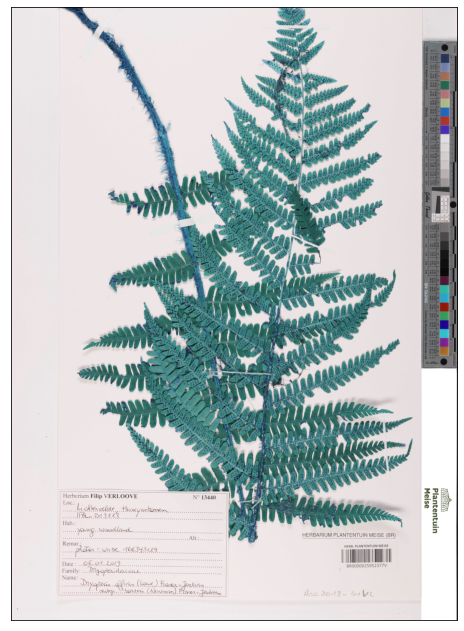

In [266]:
import cv2
from skimage.exposure import histogram
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage.filters import rank
from skimage.morphology import disk, remove_small_objects
from skimage.util import img_as_ubyte
import numpy as np

file_path = "data/full_images/http___oxalis.br.fgov.be_images_V_BR0_000_025_952_377_BR0000025952377V.jpg"
# 
# be_images_V_BR0_000_025_412_536_BR0000025412536V.jpg
# be_images_V_BR0_000_025_952_377_BR0000025952377V.jpg"

def plot_mat(mat):
    plt.figure(figsize=(8,12))
    plt.imshow(mat)
    plt.xticks([]), plt.yticks([])
    plt.show()

image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

plot_mat(image)

Resized Dimensions :  (4038, 2938, 3)


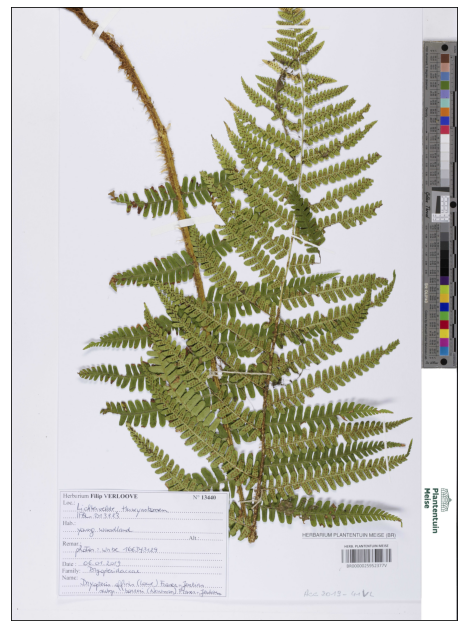

In [267]:
scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

print('Resized Dimensions : ', resized.shape)
plot_mat(resized)

In [268]:
image = resized
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

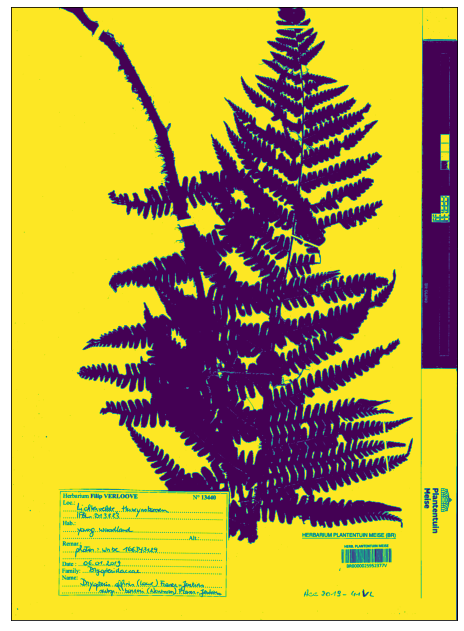

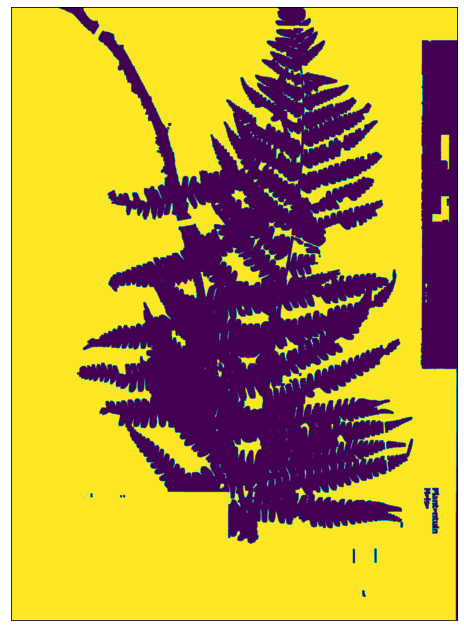

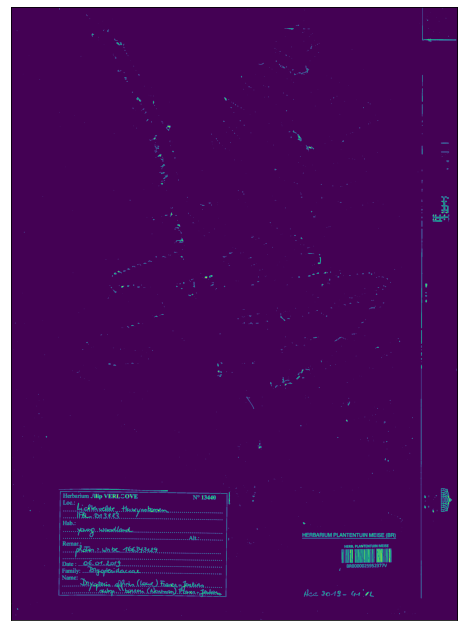

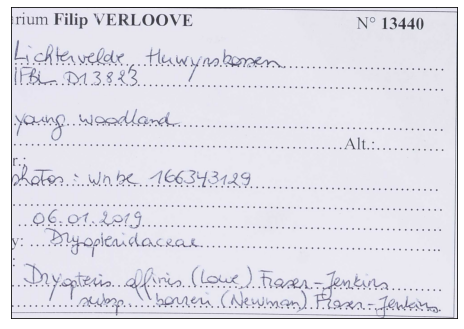

In [269]:
# threshold image
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]

# apply morphology to clean up small white or black regions
kernel = np.ones((7,7), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

# thin region to remove excess black border
#kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(morph, cv2.MORPH_ERODE, kernel)

#blurred = cv2.GaussianBlur(gray, (3, 3), 0)

#canny = cv2.Canny(blurred, 120, 255, 1)

#kernel = np.ones((5,5),np.uint8)
#dilate = cv2.dilate(canny, kernel, iterations=1)

# Find contours
#cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

plot_mat(thresh)
plot_mat(morph)
residual = morph - thresh
plot_mat(residual)

cntrs = cv2.findContours(residual, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

img_cpoy = image.copy()

area_thresh = 0
all_area = []
for c in cntrs:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    aspect = w / h
    if area > area_thresh and aspect > 1.0:
        big_contour = c
        area_thresh = area
    #cv2.rectangle(residual, (x, y), (x + w, y + h), (255, 0, 0), 2)
x,y,w,h = cv2.boundingRect(big_contour)
text = image[y:y+h, x:x+w]
#binary_text = img_cpoy[y:y+h, x:x+w] 
#cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plot_mat(text)
#plot_mat(binary_text)
#plot_mat(residual)

In [270]:
'''area_thresh = 0
for c in cntrs:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    aspect = w / h
    if area > area_thresh and aspect > 1:
        big_contour = c
        area_thresh = area

x,y,w,h = cv2.boundingRect(big_contour)
#text = original[y:y+h, x:x+w]
# extract region from thresholded image
#binary_text = thresh[y:y+h, x:x+w]  
# Iterate thorugh contours and filter for ROI
image_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    ROI = original[y:y+h, x:x+w]
    #cv2.imwrite("ROI_{}.png".format(image_number), ROI)
    image_number += 1'''

'area_thresh = 0\nfor c in cntrs:\n    area = cv2.contourArea(c)\n    x,y,w,h = cv2.boundingRect(c)\n    aspect = w / h\n    if area > area_thresh and aspect > 1:\n        big_contour = c\n        area_thresh = area\n\nx,y,w,h = cv2.boundingRect(big_contour)\n#text = original[y:y+h, x:x+w]\n# extract region from thresholded image\n#binary_text = thresh[y:y+h, x:x+w]  \n# Iterate thorugh contours and filter for ROI\nimage_number = 0\nfor c in cnts:\n    x,y,w,h = cv2.boundingRect(c)\n    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)\n    ROI = original[y:y+h, x:x+w]\n    #cv2.imwrite("ROI_{}.png".format(image_number), ROI)\n    image_number += 1'

In [271]:
#residual_thresh = cv2.threshold(residual, 220, 255, cv2.THRESH_BINARY)[1]
#plot_mat(residual_thresh)

#orig = residual_thresh.copy()

#blurred = cv2.GaussianBlur(residual_thresh, (3, 3), 0)
#canny = cv2.Canny(residual_thresh, 255, 0, 0)
#kernel = np.ones((5,5),np.uint8)
#dilate = cv2.dilate(canny, kernel, iterations=1)

# Find contours
#cntrs = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

#for c in cntrs:
#    x,y,w,h = cv2.boundingRect(c)
#    cv2.rectangle(residual_thresh, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
#plot_mat(residual_thresh)

In [272]:
#plot_mat(canny)